Check out my data preprocessing notebook: https://www.kaggle.com/code/rm1000/holistic-age-prediction-data-preprocessing

Check out my top models notebook: https://www.kaggle.com/code/rm1000/holistic-age-prediction-top-models

In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
import h5py
import gc
from IPython.display import clear_output
from IPython.display import clear_output
!pip uninstall -y seaborn
!pip install seaborn --upgrade
clear_output()
gc.collect()
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
# Models
from sklearn.linear_model import Lasso, Ridge, ElasticNet, HuberRegressor, PoissonRegressor, TweedieRegressor, PassiveAggressiveRegressor
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
!pip install pytorch_tabnet
clear_output()
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

In [2]:
training = True
file = "/kaggle/input/holistic-age-prediction-using-dna-methylation-data/data.h5"
X = np.array(h5py.File(file, "r")["X"])
y = np.array(h5py.File(file, "r")["y"])
h5py.File(file, "r").close()

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)
results = dict()

## Ridge Regression

In [4]:
# 3.721
if training:
    model = Ridge(tol=0.00668, alpha=296)
    model.fit(X_train, y_train)
    ridge_ypred = model.predict(X_val)
    mae = mean_absolute_error(ridge_ypred,y_val)
    print(round(mae,3))
    results['Ridge'] = mae

3.721


## Lasso Regression

In [5]:
# 3.675
if training:
    model = Lasso(alpha=0.0283, tol=0.00915, selection="random",random_state=54)
    model.fit(X_train, y_train)
    lasso_ypred = model.predict(X_val)
    mae = mean_absolute_error(lasso_ypred,y_val)
    print(round(mae,3))
    results['Lasso'] = mae

3.675


## Elastic Net

In [6]:
# 3.632
if training:
    model = ElasticNet(alpha=0.0648, l1_ratio=0.132, selection="random", tol=0.0194, random_state=25)
    model.fit(X_train, y_train)
    elastic_ypred = model.predict(X_val)
    mae = mean_absolute_error(elastic_ypred,y_val)
    print(round(mae,3))
    results['Elastic Net'] = mae

3.632


## Huber Regressor

In [7]:
# 3.432
if training:
    model = HuberRegressor(epsilon=1.66, alpha=273, tol=0.0940, max_iter=1000)
    model.fit(X_train, y_train)
    huber_ypred = model.predict(X_val)
    mae = mean_absolute_error(huber_ypred,y_val)
    print(round(mae,3))
    results['Huber'] = mae

3.432


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Poisson Regressor

In [8]:
# 3.845
if training:
    model = PoissonRegressor(alpha=15.2, tol=0.000299, max_iter=250)
    model.fit(X_train, y_train)
    poisson_ypred = model.predict(X_val)
    mae = mean_absolute_error(poisson_ypred,y_val)
    print(round(mae,3))
    results['Poisson'] = mae

3.845


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


## Tweedie Regressor

In [9]:
# 3.637
if training:
    model = TweedieRegressor(alpha=0.152, tol=0.00121, max_iter=500)
    model.fit(X_train, y_train)
    tweedie_ypred = model.predict(X_val)
    mae = mean_absolute_error(tweedie_ypred,y_val)
    print(round(mae,3))
    results['Tweedie'] = mae

3.637


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


## Passive Aggressive Regressor

In [10]:
# 3.873
if training:
    model = PassiveAggressiveRegressor(tol=0.0369, epsilon=0.485, early_stopping=False, C=0.0139, loss="epsilon_insensitive", max_iter=250,random_state=13)
    model.fit(X_train, y_train)
    passive_ypred = model.predict(X_val)
    mae = mean_absolute_error(passive_ypred,y_val)
    print(round(mae,3))
    results['Passive Aggressive'] = mae

3.873


## Linear SVR

In [11]:
# 3.412
if training:
    model = LinearSVR(C=0.00626, epsilon=0.0964, tol=0.00701, loss="epsilon_insensitive", max_iter=500)
    model.fit(X_train, y_train)
    linear_ypred = model.predict(X_val)
    mae = mean_absolute_error(linear_ypred,y_val)
    print(round(mae,3))
    results['Linear SVR'] = mae

3.412


## Nu SVR

In [12]:
# 3.269
if training:
    model = NuSVR(kernel='rbf', C=51.6, nu=0.634, tol=0.00300, shrinking=False, gamma='scale', max_iter=1000)
    model.fit(X_train, y_train)
    nu_ypred = model.predict(X_val)
    mae = mean_absolute_error(nu_ypred,y_val)
    print(round(mae,3))
    results['Nu SVR'] = mae

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


3.269


## SVR

In [13]:
# 3.194
if training:
    model = SVR(kernel='poly',degree=2,shrinking=True,gamma='auto',C=1.53,epsilon=0.122,tol=0.00934,coef0=0.244,max_iter=2500)
    model.fit(X_train, y_train)
    svr_ypred = model.predict(X_val)
    mae = mean_absolute_error(svr_ypred,y_val)
    print(round(mae,3))
    results['SVR'] = mae

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


3.194


## K Neighbors Regressor

In [14]:
# 3.422
if training:
    model = KNeighborsRegressor(weights='distance',n_neighbors=3,p=1.0972663481561422)
    model.fit(X_train, y_train)
    kneigh_ypred = model.predict(X_val)
    mae = mean_absolute_error(kneigh_ypred,y_val)
    print(round(mae,3))
    results['K Neighbors'] = mae

3.422


## Decision Tree Regressor

In [15]:
# 4.561
if training:
    model = DecisionTreeRegressor(max_depth=23, splitter="best", criterion="squared_error", min_samples_split=2,random_state=6)
    model.fit(X_train, y_train)
    decision_ypred = model.predict(X_val)
    mae = mean_absolute_error(decision_ypred,y_val)
    print(round(mae,3))
    results['Decision Tree'] = mae

4.561


## Extra Tree Regressor

In [16]:
# 4.551
if training:
    model = ExtraTreeRegressor(max_depth=31, splitter="best", criterion="friedman_mse", min_samples_split=2,random_state=14)
    model.fit(X_train, y_train)
    extra_ypred = model.predict(X_val)
    mae = mean_absolute_error(extra_ypred,y_val)
    print(round(mae,3))
    results['Extra Tree'] = mae

4.551


## Ada Boost Regressor

In [17]:
# 3.081
if training:
    model = AdaBoostRegressor(learning_rate=0.833, n_estimators=17, estimator=DecisionTreeRegressor(max_depth=23, splitter="best", criterion="squared_error", min_samples_split=2))
    model.fit(X_train, y_train)
    ada_ypred = model.predict(X_val)
    mae = mean_absolute_error(ada_ypred,y_val)
    print(round(mae,3))
    results['Ada Boost'] = mae

3.052


## Gradient Boosting Regressor

In [18]:
# 2.740
if training:
    model = GradientBoostingRegressor(n_estimators=12, learning_rate=0.577, max_depth=17, init=SVR(kernel='poly',degree=2,shrinking=True,gamma='auto',C=1.53,epsilon=0.122,tol=0.00934,coef0=0.244,max_iter=2500))
    model.fit(X_train, y_train)
    gradient_ypred = model.predict(X_val)
    mae = mean_absolute_error(gradient_ypred,y_val)
    print(round(mae,3))
    results['Gradient Boost'] = mae

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


2.696


## Random Forest Regressor

In [19]:
# 3.721
if training:
    model = RandomForestRegressor(n_estimators=15, max_depth=23, random_state=8)
    model.fit(X_train, y_train)
    random_ypred = model.predict(X_val)
    mae = mean_absolute_error(random_ypred,y_val)
    print(round(mae,3))
    results['Random Forest'] = mae

3.721


## LightGBM Regressor

In [20]:
# 2.766
if training:
    model = LGBMRegressor(n_estimators=133, learning_rate=0.0951, num_leaves=80,subsample=0.9)
    model.fit(X_train, y_train)
    light_ypred = model.predict(X_val)
    mae = mean_absolute_error(light_ypred,y_val)
    print(round(mae,3))
    results['LightGBM'] = mae

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.338582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1034850
[LightGBM] [Info] Number of data points in the train set: 4699, number of used features: 4818
[LightGBM] [Info] Start training from score 48.472766
2.766


## XGBoost Regressor

In [21]:
# 3.272
if training:
    model = XGBRegressor(n_estimators=58,subsample=1.0)
    model.fit(X_train, y_train)
    xgb_ypred = model.predict(X_val)
    mae = mean_absolute_error(xgb_ypred,y_val)
    print(round(mae,3))
    results['XGBoost'] = mae

3.272


## CatBoost Regressor

In [22]:
# GPU
# 2.659
if training:
    model = CatBoostRegressor(iterations=1900,min_data_in_leaf=1,learning_rate=0.0281,max_leaves=51,l2_leaf_reg=0.114,grow_policy='Lossguide',logging_level='Silent',task_type='GPU')
    model.fit(X_train, y_train)
    cat_ypred = model.predict(X_val)
    mae = mean_absolute_error(cat_ypred,y_val)
    print(round(mae,3))
    results['CatBoost'] = mae

2.659


## TabNet Regressor

In [23]:
# GPU
# 3.023
if training:
    model = TabNetRegressor(momentum=0.0275,gamma=1.19,lambda_sparse=0.000146,n_d=10,n_a=8,device_name='cuda')
    model.fit(X_train, y_train.reshape(-1, 1), eval_metric=['mae'], eval_set=[(X_val,y_val.reshape(-1, 1))])
    tab_ypred = model.predict(X_val)
    mae = mean_absolute_error(tab_ypred,y_val)
    print(round(mae,3))
    results['TabNet'] = mae

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2862.46558| val_0_mae: 48.6975212097168|  0:00:01s
epoch 1  | loss: 2729.69336| val_0_mae: 46.6298713684082|  0:00:01s
epoch 2  | loss: 2551.90729| val_0_mae: 40.975440979003906|  0:00:02s
epoch 3  | loss: 2326.2959| val_0_mae: 40.00503921508789|  0:00:02s
epoch 4  | loss: 2081.10458| val_0_mae: 35.71358871459961|  0:00:03s
epoch 5  | loss: 1770.80612| val_0_mae: 33.48318862915039|  0:00:03s
epoch 6  | loss: 1456.80487| val_0_mae: 33.976661682128906|  0:00:04s
epoch 7  | loss: 1062.95421| val_0_mae: 31.35890007019043|  0:00:04s
epoch 8  | loss: 698.38576| val_0_mae: 29.55694007873535|  0:00:05s
epoch 9  | loss: 400.70715| val_0_mae: 24.67683982849121|  0:00:05s
epoch 10 | loss: 243.36018| val_0_mae: 21.86117935180664|  0:00:06s
epoch 11 | loss: 220.94682| val_0_mae: 25.705280303955078|  0:00:06s
epoch 12 | loss: 193.98323| val_0_mae: 22.318130493164062|  0:00:07s
epoch 13 | loss: 162.67467| val_0_mae: 20.618379592895508|  0:00:08s
epoch 14 | loss: 151.63316| val_0_mae:

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


3.023


# Model Comparison

In [24]:
results = sorted(results.items(), key=lambda v: v[1])
model_names = [k for k,v in results]
model_mae = [v for k,v in results]
results

[('CatBoost', 2.658506550186924),
 ('Gradient Boost', 2.695554870287857),
 ('LightGBM', 2.76561819576362),
 ('TabNet', 3.0227408),
 ('Ada Boost', 3.0520590520415967),
 ('SVR', 3.19416959417882),
 ('Nu SVR', 3.268928938832804),
 ('XGBoost', 3.2715156),
 ('Linear SVR', 3.412467784496167),
 ('K Neighbors', 3.422286457037281),
 ('Huber', 3.432012862210066),
 ('Elastic Net', 3.6320543),
 ('Tweedie', 3.6369089675782957),
 ('Lasso', 3.6747556),
 ('Ridge', 3.7209),
 ('Random Forest', 3.7212005475035848),
 ('Poisson', 3.84547157490634),
 ('Passive Aggressive', 3.87305403132002),
 ('Extra Tree', 4.550757382216415),
 ('Decision Tree', 4.5607499522452555)]

In [25]:
def confidence_ints(true_y,pred_y):
    maes = []
    for _ in range(10000):
        y_resample, pred_resample = resample(true_y, pred_y)
        maes.append(mean_absolute_error(y_resample, pred_resample))
    ci_lower,ci_upper = np.percentile(maes, [2.5,97.5])
    return round(ci_lower,3),round(ci_upper,3)

In [26]:
confident_results = {modeln:[round(modelmae,3)] for modeln,modelmae in results}
confident_results['Ridge'] += list(confidence_ints(y_val,ridge_ypred))
confident_results["Lasso"] += list(confidence_ints(y_val,lasso_ypred))
confident_results["Elastic Net"] += list(confidence_ints(y_val,elastic_ypred))
confident_results["Huber"] += list(confidence_ints(y_val,huber_ypred))
confident_results["Poisson"] += list(confidence_ints(y_val,poisson_ypred))
confident_results["Tweedie"] += list(confidence_ints(y_val,tweedie_ypred))
confident_results["Passive Aggressive"] += list(confidence_ints(y_val,passive_ypred))
confident_results["Linear SVR"] += list(confidence_ints(y_val,linear_ypred))
confident_results["Nu SVR"] += list(confidence_ints(y_val,nu_ypred))
confident_results["SVR"] += list(confidence_ints(y_val,svr_ypred))
confident_results["K Neighbors"] += list(confidence_ints(y_val,kneigh_ypred))
confident_results["Decision Tree"] += list(confidence_ints(y_val,decision_ypred))
confident_results["Extra Tree"] += list(confidence_ints(y_val,extra_ypred))
confident_results["Ada Boost"] += list(confidence_ints(y_val,ada_ypred))
confident_results["Gradient Boost"] += list(confidence_ints(y_val,gradient_ypred))
confident_results["Random Forest"] += list(confidence_ints(y_val,random_ypred))
confident_results["LightGBM"] += list(confidence_ints(y_val,light_ypred))
confident_results["XGBoost"] += list(confidence_ints(y_val,xgb_ypred))
confident_results["CatBoost"] += list(confidence_ints(y_val,cat_ypred))
confident_results["TabNet"] += list(confidence_ints(y_val,tab_ypred))
vcresults = dict(sorted(confident_results.items(), key=lambda v: v[1]))
vcresults

{'CatBoost': [2.659, 2.447, 2.887],
 'Gradient Boost': [2.696, 2.482, 2.916],
 'LightGBM': [2.766, 2.542, 2.999],
 'TabNet': [3.023, 2.82, 3.233],
 'Ada Boost': [3.052, 2.806, 3.308],
 'SVR': [3.194, 2.976, 3.434],
 'Nu SVR': [3.269, 3.059, 3.499],
 'XGBoost': [3.272, 3.037, 3.516],
 'Linear SVR': [3.412, 3.173, 3.652],
 'K Neighbors': [3.422, 3.151, 3.707],
 'Huber': [3.432, 3.2, 3.667],
 'Elastic Net': [3.632, 3.42, 3.868],
 'Tweedie': [3.637, 3.419, 3.868],
 'Lasso': [3.675, 3.457, 3.904],
 'Ridge': [3.721, 3.498, 3.95],
 'Random Forest': [3.721, 3.482, 3.977],
 'Poisson': [3.845, 3.6, 4.095],
 'Passive Aggressive': [3.873, 3.656, 4.095],
 'Extra Tree': [4.551, 4.195, 4.922],
 'Decision Tree': [4.561, 4.212, 4.923]}

In [27]:
mae_means = []
error = []
for vs in vcresults.values():
    mae_means.append(vs[0])
    error.append([vs[0]-vs[1],vs[2]-vs[0]])

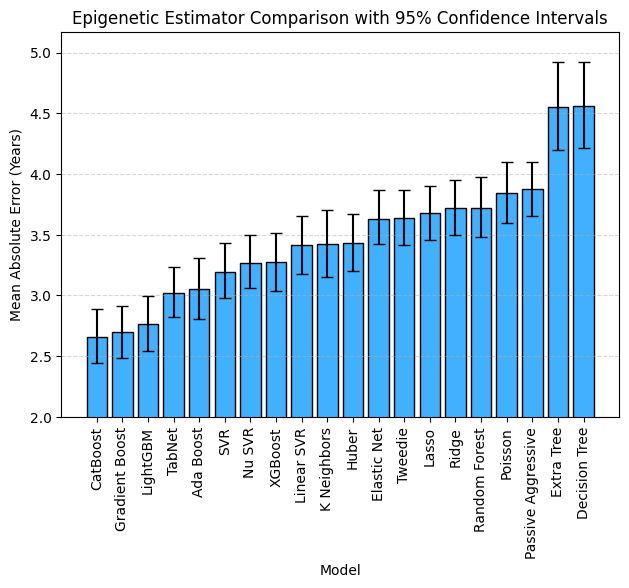

In [28]:
plt.figure(figsize=(7.2,5),dpi=100)
plt.title("Epigenetic Estimator Comparison with 95% Confidence Intervals")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (Years)")
plt.bar(vcresults.keys(), mae_means, yerr=np.array(error).T, capsize=4, color='#40B0FF', edgecolor='black')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(bottom=2)
plt.show()